<a href="https://colab.research.google.com/github/SK-0911/Stock-Sentiment-Analysis-using-News-Headlines/blob/main/Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Sentiment Analysyis Using News Headlines**


---







## **Data pre-processing**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mini-project(sem 5)/Data.csv', encoding='ISO-8859-1')
df.head(7)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
5,2000-01-10,1,Fifth round draw,BBC unveils secret weapon in ratings war: Sout...,Second Division round-up,European round-up,Third Division round-up,Welfare could claim Killie tie as Caley Thistl...,Ferguson puts brave face on Rio meltdown,Southgate in striking form to pre-empt penalties,...,Time Warner and AOL to merge,Keep up,Waging global war,"Desktop icons, No 1: The Qwerty keyboard",The sec's files,The low down: Workplace bullying,Met 'not equipped' to solve murders,Tranmere tie will not be replayed,Rebel attacks take toll on Russia,Met lent stopped car to Lawrence
6,2000-01-11,1,Man Utd 2 - 0 South Melbourne,How North Atlantic drift could carry away Old ...,Buoyant BBC to show Brazil final live,Tranmere given all-clear in the Cup,United sit poorly with the Doc,Queen's Park peril clouds Hampden future,Waugh hits out at Shoaib reprieve,Knight makes case for Butcher's place,...,I'd like that in writing,Split vote may offer 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.tail(10)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
4091,2016-06-20,1,A staggering 87 percent of Venezuelans say the...,Two corporate whistleblowers may enter into pl...,"Poland, together with Russia, Iran, and severa...",Three environmental activists were killed per ...,"Ontario funeral business dissolves the dead, p...",New Declassified Documents Reveal How CIA Abus...,Tens of thousands of people gathered in swelte...,Japan's dementia crisis hits record levels as ...,...,"Three dead, 45 injured as labor union clashes ...",Indonesia vows to stand firm after skirmishes ...,A study of ocean plankton has shown that an in...,Australia taxes foreign home buyers as afforda...,Paris isn't happy about Amazon's one-hour deli...,Australian man pleads guilty to making sexual ...,Trudeau condemns killing of 14 Canadian Embass...,Vladimir Putin is considering selling part of ...,An elephant has survived being shot in the hea...,Wikileaks founder Julian Assange marks 5 years...
4092,2016-06-21,1,An Australian athlete who has competed in six ...,Russian state television accidentally broadcas...,"In 2015, 50 environmentalists were killed in B...",China's plan to cut meat consumption by 50% ch...,Coral bleaching event now biggest in history ...,Super-rich quaff champagne in Venezuela countr...,Hong Kong bookseller refuses to be silenced af...,Chinese prosecutors have successfully sued a c...,...,Turkey charges Reporters Without Borders press...,Brussels: Bomb alert at shopping centre sparks...,Australian Paralympian Liesl Tesch robbed at g...,China issues orders to demolish Buddhist 'town...,Gazans squeezed by triple taxes as Hamas repla...,US and Russian fighters in dramatic showdown o...,Rising Tide of 'Politically Acceptable' Killin...,Mexico teachers protest: Six people are dead a...,Canada is set to launch a paid whistleblower p...,Russian football fan leader Alexander Shprygin...
4093,2016-06-22,0,German government agrees to ban fracking indef...,Teenage recruits were raped by staff and force...,Pakistan is selling nuclear materials to N Kor...,Amazon jaguar shot dead at Olympic torch ceremony,Mexican flags raised around Donald Trump's gol...,EU smashes 2020 emissions target six years ear...,Police kill eight striking Mexican teachers as...,Pro-choice activists have delivered abortion p...,...,Turkish students and graduates from 370 school...,"Japan Election Campaign Kicks off, Voting Age ...",Moscow has signed an agreement with Los Angele...,TEPCO admits meltdown cover-up - The president...,Indian State Grants Jews Minority Status - Ind...,Canadian Rescue Plane successfully reaches Sou...,The Swedish parliament on Tuesday voted in fav...,French police teargas migrants trying to board...,Qawwali musician Amjad Sabri was shot dead in ...,N. Korea launches what appears to be Musudan m...
4094,2016-06-23,1,Today The United Kingdom decides whether to re...,"E-cigarettes should not be banned in public, m...",Report: China is still harvesting organs from ...,"Man opens fire at cinema complex in Germany, s...","Erdoan: Europe, you dont want us because were ...",Asian millionaires now control more wealth tha...,A Japanese porn industry association has apolo...,University students are being warned when clas...,...,"Colombia, FARC announce full ceasefire, 'last ...",Gunmen kill Sufi devotional singer Amjad Sabri...,India launches 20 satellites in single mission,F-16s to be manufactured soon in an assembly l...,Australia's gun laws stopped mass shootings an...,French cement company in Syria buys oil from I...,Pope to visit Armenia after irking Turkey with...,Merkel says NATO must be strengthened,"China cracks down on online comments, click-ba...",The prime minister of India is set to get a br...
4095,2016-06-24,0,David Cameron to Resign as PM After EU Referendum,BBC forecasts UK votes to Leave the European U...,Nicola Sturgeon says a second independence ref...,It's official. Britain v

---

1.   25 headlines of that particular day
2.   Label has 2 categories(0 or 1), 1 means the stock price will increase and 0 means the stock will either decrease or remain constant.



In [ ]:
#Separate test data and training data
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [ ]:
train.tail(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
3972,2015-12-29,1,Pentagon thwarts Obama's effort to close Guant...,Rare Footage of Giant Squid in Japan,Muslims tell ISIS they'd rather see Star Wars ...,Syrian Journalist Who Documented ISIS Atrociti...,North Korea's second most-powerful man sent to...,Austria Turns Away Hundreds of Migrants for Ly...,Saudi Grand Mufti calls ISIS part of the Israe...,"'What has war yielded, neither land nor heaven...",...,Iran Hands Over Stockpile of Enriched Uranium ...,Registrar Shuts Down All Pirate Bay Domain Names,The Irish Government has taken unprecedented a...,Saudi Arabia to raise domestic petrol prices b...,Saudi Arabia hikes petrol prices by 40% at the...,World Health Organization declares Guinea Ebol...,Hacker group Anonymous is helping the 'Making ...,Russia 'has removed uranium from Iran',China threatens to shoot down Australian aircr...,Israel warns Brazil to accept its settler amba...
3973,2015-12-30,0,Tech companies face criminal charges if they n...,Mexican marijuana farmers see profits tumble a...,A would-be suicide bomber and his wife have be...,The rich will get richer while two million mor...,The North Pole will have above freezing temper...,South Australia - New sexting laws to spare ch...,ISIS militants burn 20 media activists to deat...,Italy fines Apple over misleading tax conduct,...,Norway to turn back asylum seekers on Swedish ...,Islamic State Suffers Double Blow As Ramadi Fa...,Journalist reveals Erdoan imprisoned him for e...,Russian Moon base plan falls victim to budget ...,"Belgium, Netherlands to exchange territory wi...",North Korea says top official Kim Yang-gon kil...,Putin's Son-in-Law Boosted by $1.75 Bln Russia...,An orgasm a day could cut prostate cancer risk,"Germans claim Belgian nuclear reactors are ""fa...",UK Sperm Bank Doesn't Accept Donors with Dysle...
3974,2015-12-31,0,Microsoft Corp said on Wednesday it will begin...,Greek Orthodox Church: Homosexuals are God's c...,"Vladmir Putin officially dissolves Roscosmos, ...",Donald Trump could be refused entry to the UK ...,Saudi Arabia says its ready to meet any additi...,New Year fireworks and festivities have been c...,New species of human may have shared our caves...,Egypt becomes second nation to shut down Faceb...,...,Ramadi residents fleeing ISIS: 'They wanted to...,Israeli Gov't approves NIS 15-billion plan to ...,Russia denies 'absurd' claims that air strikes...,Web attack knocks BBC websites offline,Iran says any U.S. sanctions on missiles illegal,Maternity Benefits: Indian Government plans to...,'Rat on a plane' forces Air India flight to tu...,Philippines to join China-backed AIIB infrastr...,ESPN invites five FIFA presidential candidates...,Hamas to keep Palestinians from ringing in New...


In [ ]:
test.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
3723,2015-01-02,1,Most cases of cancer are the result of sheer b...,Iran dismissed United States efforts to fight ...,Poll: One in 8 Germans would join anti-Muslim ...,UK royal family's Prince Andrew named in US la...,Some 40 asylum-seekers refused to leave the bu...,Pakistani boat blows self up after India navy ...,Sweden hit by third mosque arson attack in a week,940 cars set alight during French New Year,...,Ukrainian minister threatens TV channel with c...,Palestinian President Mahmoud Abbas has entere...,Israeli security center publishes names of 50 ...,The year 2014 was the deadliest year yet in Sy...,A Secret underground complex built by the Nazi...,Restrictions on Web Freedom a Major Global Iss...,Austrian journalist Erich Mchel delivered a pr...,Thousands of Ukraine nationalists march in Kiev,Chinas New Years Resolution: No More Harvestin...,Authorities Pull Plug on Russia's Last Politic...
3724,2015-01-05,0,Moscow-&gt;Beijing high speed train will reduc...,Two ancient tombs were discovered in Egypt on ...,China complains to Pyongyang after N Korean so...,Scotland Headed Towards Being Fossil Fuel-Free...,Prime Minister Shinzo Abe said Monday he will ...,Sex slave at centre of Prince Andrew scandal f...,Gay relative of Hamas founder faces deportatio...,The number of female drug addicts in Iran has ...,...,The Islamic State has approved a 2015 budget o...,"Iceland To Withdraw EU Application, Lift Capit...",Blackfield Capital Founder Goes Missing: The v...,Rocket stage crashes back to Earth in rural Ch...,2 Dead as Aircraft Bombs Greek Tanker in Libya...,Belgian murderer Frank Van Den Bleeken to die ...,Czech President criticizes Ukrainian PM; says ...,3 Vietnamese jets join search for 16 missing F...,France seeks end to Russia sanctions over Ukraine,China scraps rare earths caps
3725,2015-01-06,0,US oil falls below $50 a barrel,"Toyota gives away 5,680 fuel cell patents to b...",Young Indian couple who had been granted polic...,A senior figure in Islamic States self-declare...,Fukushima rice passes radiation tests for 1st ...,Nearly all Spanish parties guilty of financial...,King Abdullah to abdicate Saudi Throne,Taliban Commander Caught Networking On LinkedIn,...,Thousands of Indians have fled from their home...,Turkey sacks judges who oversaw Erdogan corrup...,SpaceX Falcon 9 launch and recovery has been a...,CNN: Americans charged in botched Gambia coup,Islamic State 'Police' Official Beheaded.,Libya bans Palestinians from country to preven...,A judicial inquiry was opened in France on Mon...,Video has captured the moment a cameraman was ...,Syria has complained to the United Nations tha...,"Tests over, India set to make the iris of bigg..."


In [ ]:
test.tail(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
4098,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
4099,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
4100,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...


In [ ]:
test.shape

(378, 27)

In [ ]:
train.shape

(3975, 27)

In [ ]:
data = train.iloc[:, 2: 27]   #All rows but columns from 2 to 27
data.head(3)  #Only headlines will be displayed

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


In [ ]:
#Removing special character from the headlines

data.replace('[^a-zA-Z]', ' ', inplace=True) #Inplace is set to true because we want the changes to be reflected in the actual data
data.head(3)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


In [ ]:
data['Top1']

0       A 'hindrance to operations': extracts from the...
1                                               Scorecard
2                       Coventry caught on counter by Flo
3                           Pilgrim knows how to progress
4                                    Hitches and Horlocks
                              ...                        
3970    Brazil declares emergency after 2,400 babies a...
3971    Germany recruits 8,500 teachers to teach Germa...
3972    Pentagon thwarts Obama's effort to close Guant...
3973    Tech companies face criminal charges if they n...
3974    Microsoft Corp said on Wednesday it will begin...
Name: Top1, Length: 3975, dtype: object

In [ ]:
data.columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')



---

### Columns not easy to access through their original names which is Top1, Top2,etc

### Hence, we will give the column names as numerial values for the ease of access

In [ ]:
new_index = [str(i) for i in range(25)]
data.columns = new_index
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')

In [ ]:
data['3']

0                Jack gets his skates on at ice-cold Alex
1                                           Cheerio, boyo
2           Police help Smith lay down the law at Everton
3                         Leicester bin stadium blueprint
4                                             Alan Parker
                              ...                        
3970    Wiretapping reveals communication between Turk...
3971    Milan and Rome ban cars as pollution rises. Mi...
3972    Syrian Journalist Who Documented ISIS Atrociti...
3973    The rich will get richer while two million mor...
3974    Donald Trump could be refused entry to the UK ...
Name: 3, Length: 3975, dtype: object

In [ ]:
# Convert into lowercase for consistency
for index in new_index:
  data[index] = data[index].str.lower()

data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a 'hindrance to operations': extracts from the...,scorecard,hughes' instant hit buoys blues,jack gets his skates on at ice-cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar's debut double,"southgate strikes, leeds pay the penalty",...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl's successor drawn into scandal,the difference between men and women,"sara denver, nurse turned solicitor",diana's landmine crusade put tories in a panic,yeltsin's resignation caught opposition flat-f...,russian roulette,sold out,recovering a title


## **Data wrangling and Merging**

In [ ]:
data.iloc[1, 0:25]

0                                             scorecard
1                                   the best lake scene
2                         leader: german sleaze inquiry
3                                         cheerio, boyo
4                              the main recommendations
5                                has cubie killed fees?
6                                has cubie killed fees?
7                                has cubie killed fees?
8     hopkins 'furious' at foster's lack of hannibal...
9                                has cubie killed fees?
10                                  a tale of two tails
11              i say what i like and i like what i say
12                             elbows, eyes and nipples
13      task force to assess risk of asteroid collision
14                           how i found myself at last
15                                 on the critical list
16                            the timing of their lives
17                                          dear

### Combining these headlines together so that I can convert this text into vectors


In [ ]:
' '.join([str(x) for x in data.iloc[1,0:25]])

"scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main recommendations has cubie killed fees? has cubie killed fees? has cubie killed fees? hopkins 'furious' at foster's lack of hannibal appetite has cubie killed fees? a tale of two tails i say what i like and i like what i say elbows, eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man's extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn't know without the movies millennium bug fails to bite"

### Combining all the headlines of all the rows

In [ ]:
headlines = []

for row in range(0, len(data)):
  headlines.append(' '.join([str(x) for x in data.iloc[row,0:25]]))

In [ ]:
headlines[0:3]

["a 'hindrance to operations': extracts from the leaked reports scorecard hughes' instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton's party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar's debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like it's 1999 wear wolves have turned into lambs stump mike catches testy gough's taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl's successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor diana's landmine crusade put tories in a panic yeltsin's resignation caught opposition flat-footed russian roulette sold out recovering a title",
 "scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main

### The headlines list is now going to be fed into a NLP model after converting it into vectors

Random Forest follows Ensemble learning Approach

#### random Forest with Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
## implement BAG OF WORDS --> Adds sentiments to the words
cv=CountVectorizer(ngram_range=(2,2))
traindata_x=cv.fit_transform(headlines)

In [ ]:
# implement RandomForest Classifier,almost takes 2 mins
randomclassifier=RandomForestClassifier(n_estimators=800,criterion='gini')  # Try criterion = "Entropy"
randomclassifier.fit(traindata_x,train['Label'])

RandomForestClassifier(n_estimators=800)

In [ ]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))


In [ ]:
test_data = cv.transform(test_transform)


In [ ]:
randomclassifier.fit(traindata_x,train['Label'])

RandomForestClassifier(n_estimators=800)

In [ ]:
predictions = randomclassifier.predict(test_data)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Confusion Matrix

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[134  52]
 [  1 191]]


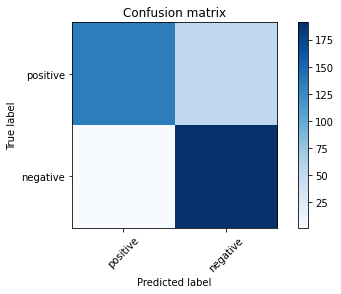

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
plt.figure()
cm=confusion_matrix(test['Label'],predictions)
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [ ]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
score=accuracy_score(test['Label'],predictions)
print(score)

0.8597883597883598


In [ ]:
report=classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.72      0.83       186
           1       0.79      0.99      0.88       192

    accuracy                           0.86       378
   macro avg       0.89      0.86      0.86       378
weighted avg       0.89      0.86      0.86       378



### Random Forest with Tf-idf


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer(ngram_range=(2,2))
traindata_x=tfidf.fit_transform(headlines)

In [ ]:
randomclassifier=RandomForestClassifier(n_estimators=800,criterion='gini')
randomclassifier.fit(traindata_x,train['Label'])

RandomForestClassifier(n_estimators=800)

In [ ]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [ ]:
test_dataset = tfidf.transform(test_transform)

In [ ]:
randomclassifier.fit(traindata_x,train['Label'])

RandomForestClassifier(n_estimators=800)

In [ ]:
predictions = randomclassifier.predict(test_data)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
score=accuracy_score(test['Label'],predictions)
print(score)

0.8306878306878307


In [ ]:
report=classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       186
           1       0.81      0.87      0.84       192

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378



[[147  39]
 [ 25 167]]


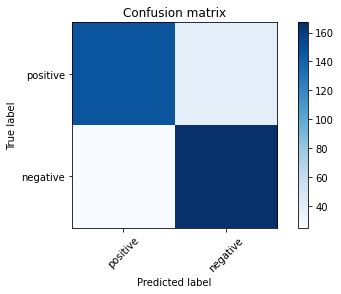

In [ ]:
plt.figure()
cm=confusion_matrix(test['Label'],predictions)
print(cm)
plot_confusion_matrix(cm)    
plt.show()

### Implement MultinomialNB

[[137  49]
 [  9 183]]


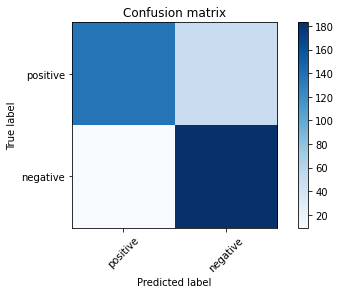

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(traindata_x,train['Label'])

predictions = nb.predict(test_data)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)

plot_confusion_matrix(matrix)

In [ ]:
score=accuracy_score(test['Label'],predictions)
print(score)

0.8465608465608465


In [ ]:
report=classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       186
           1       0.79      0.95      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.85      0.84       378

